In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
salesData = pd.read_csv("Financial Sample.csv")

In [57]:
# Convert currency columns to numeric values
currency_columns = ["Gross Sales", "Discounts", "Sales", "COGS", "Profit", "Manufacturing Price", "Sale Price"]

# remove leading and trailing spaces
salesData.columns = salesData.columns.str.strip()

for column in currency_columns:
        salesData[column] = salesData[column].replace(r'[\$,]', '', regex=True).astype(float)

salesData

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,United States of America,Paseo,Low,3450.0,10.0,350.0,1207500.0,48300.00,1159200.00,897000.0,262200.00,7/1/2014,7,July,2014
1,Government,France,Amarilla,None,2750.0,260.0,350.0,962500.0,0.00,962500.00,715000.0,247500.00,2/1/2014,2,February,2014
2,Government,Germany,Velo,Low,2966.0,120.0,350.0,1038100.0,20762.00,1017338.00,771160.0,246178.00,10/1/2013,10,October,2013
3,Government,Germany,Amarilla,Low,2966.0,260.0,350.0,1038100.0,20762.00,1017338.00,771160.0,246178.00,10/1/2013,10,October,2013
4,Government,Germany,Velo,Low,2877.0,120.0,350.0,1006950.0,20139.00,986811.00,748020.0,238791.00,10/1/2014,10,October,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Enterprise,United States of America,Velo,High,2438.0,120.0,125.0,304750.0,45712.50,259037.50,292560.0,-33522.50,12/1/2013,12,December,2013
696,Enterprise,Mexico,Carretera,High,2821.0,3.0,125.0,352625.0,49367.50,303257.50,338520.0,-35262.50,12/1/2013,12,December,2013
697,Enterprise,United States of America,Amarilla,High,2844.0,260.0,125.0,355500.0,49770.00,305730.00,341280.0,-35550.00,5/1/2014,5,May,2014
698,Enterprise,Germany,Carretera,High,2767.0,3.0,125.0,345875.0,51881.25,293993.75,332040.0,-38046.25,8/1/2014,8,August,2014


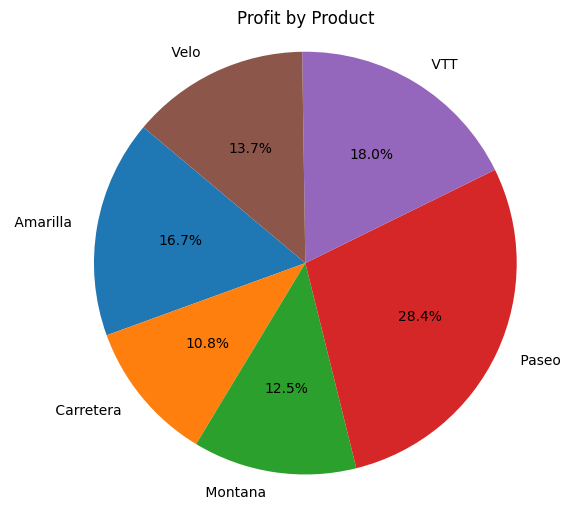

In [58]:

profit_by_product = salesData.groupby('Product')['Profit'].sum()

plt.figure(figsize=(6, 6))
plt.pie(profit_by_product, labels=profit_by_product.index, autopct='%1.1f%%', startangle=140)
plt.title('Profit by Product')
plt.axis('equal')  
plt.show()

In [59]:
# 1. Profit Analysis
salesData['Profit'] = (salesData['Profit'] / salesData['Sales']) * 100

# 2. Sales Trend Analysis
salesData['Date'] = pd.to_datetime(salesData['Date'])
sales_trend = salesData.groupby(salesData['Date'].dt.to_period('M')).agg({'Sales': 'sum'}).reset_index()
sales_trend['Date'] = sales_trend['Date'].dt.to_timestamp()

# 3. Cost Analysis by Product
cost_analysis = salesData.groupby('Product').agg({'COGS': 'sum', 'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# 4. Discount Impact Analysis
discount_impact = salesData.groupby('Discount Band').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# 5. Country-wise Analysis
country_analysis = salesData.groupby('Country').agg({
    'Units Sold': 'sum',
    'Gross Sales': 'sum',
    'Discounts': 'sum',
    'Sales': 'sum',
    'COGS': 'sum',
    'Profit': 'sum',
    'Profit': 'mean'
}).reset_index()

# 6. Product-wise Analysis
product_analysis = salesData.groupby('Product').agg({
    'Units Sold': 'sum',
    'Gross Sales': 'sum',
    'Discounts': 'sum',
    'Sales': 'sum',
    'COGS': 'sum',
    'Profit': 'sum',
    'Profit': 'mean'
}).reset_index()

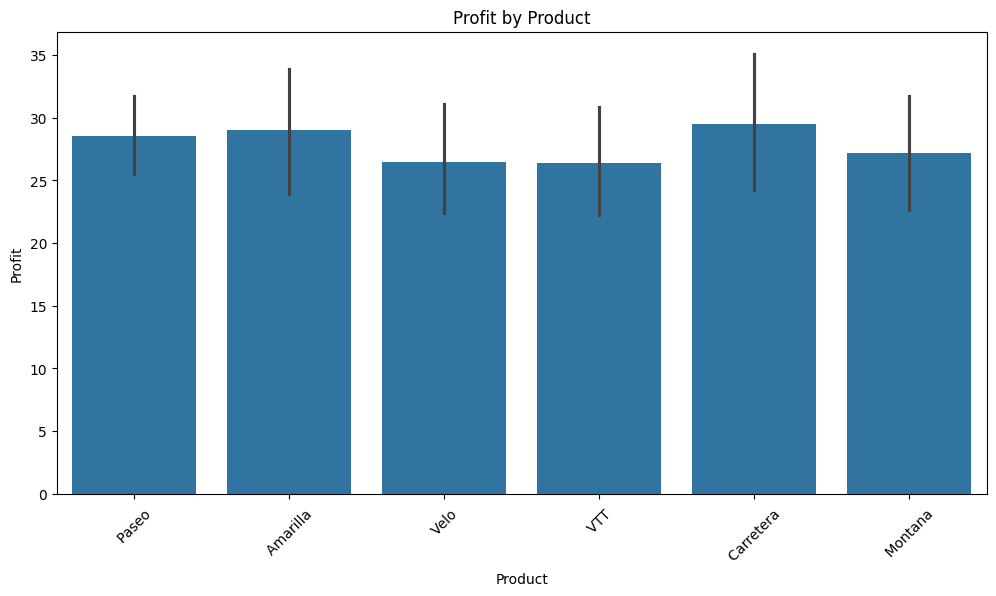

In [60]:
# Profit by Product
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Profit', data=salesData)
plt.title('Profit by Product')
plt.xticks(rotation=45)
plt.show()

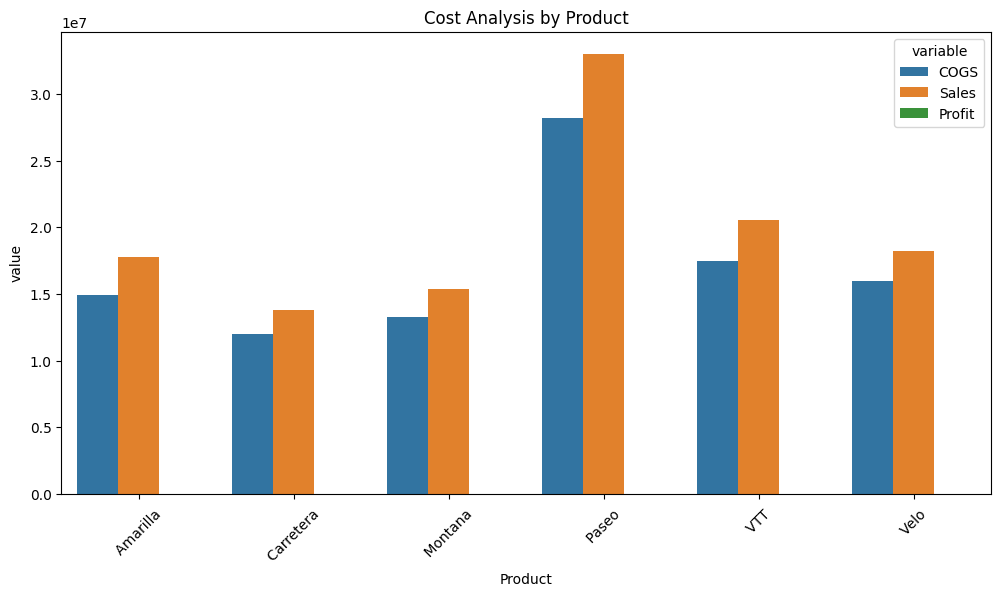

In [61]:

# Cost Analysis by Product
plt.figure(figsize=(12, 6))
cost_analysis_melted = cost_analysis.melt(id_vars='Product', value_vars=['COGS', 'Sales', 'Profit'])
sns.barplot(x='Product', y='value', hue='variable', data=cost_analysis_melted)
plt.title('Cost Analysis by Product')
plt.xticks(rotation=45)
plt.show()


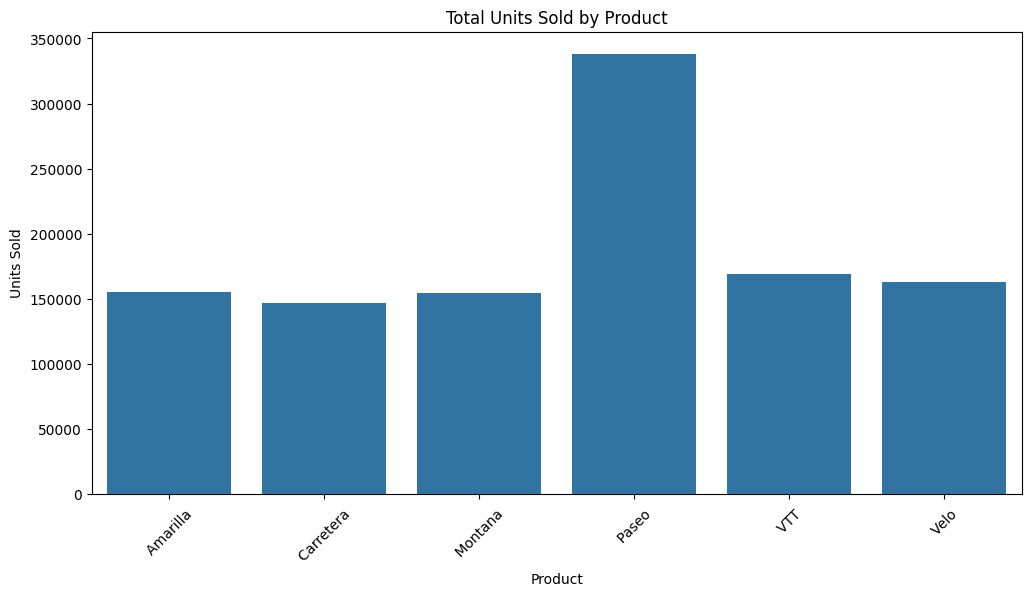

In [62]:

# Product-wise Analysis: Total Units Sold
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Units Sold', data=product_analysis)
plt.title('Total Units Sold by Product')
plt.xticks(rotation=45)
plt.show()



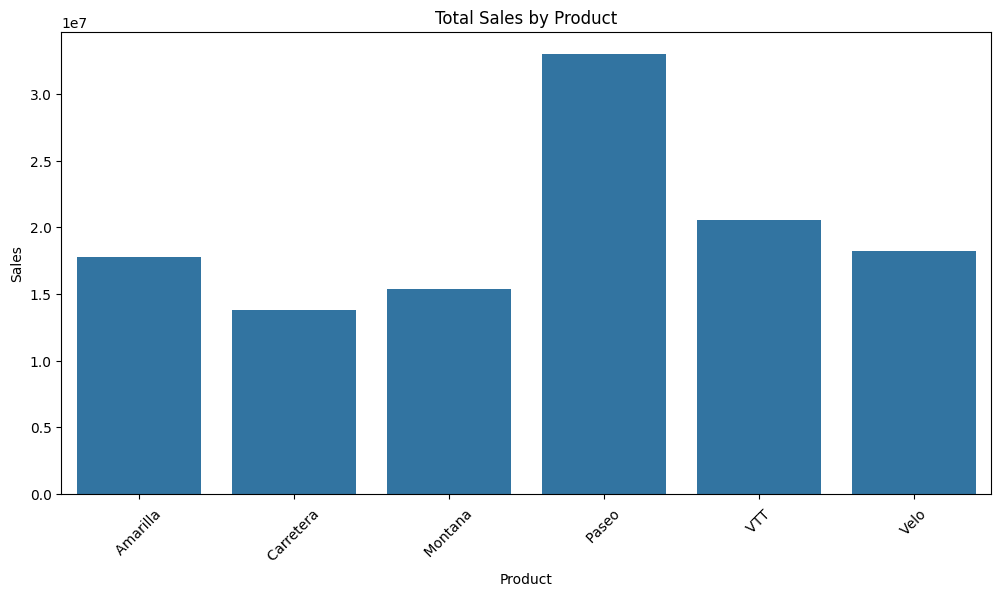

In [63]:
# Product-wise Analysis: Total Sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Sales', data=product_analysis)
plt.title('Total Sales by Product')
plt.xticks(rotation=45)
plt.show()
